<a href="https://colab.research.google.com/github/coldperformer/deep-learning-projects/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><center><h1>Image Captioning</h1></center></strong>

<strong><h3>Contribution Table:</h3></strong>

<center>
<table width=100%>
    <tr>
        <th><center>Group No</center></th>
        <th><center>Name</center></th>
        <th><center>Student Email ID</center></th>
        <th><center>%age Contribution</center></th>
    </tr>
    <tr>
        <td><center>009</center></td>
        <td><center>Mukesh Kumar</center></td>
        <td><center>2021fc04020@wilp.bits-pilani.ac.in</center></td>
        <td><center>Equal (100%)</center></td>
    </tr>
    <tr>
        <td><center>009</center></td>
        <td><center>Anurag Bansal</center></td>
        <td><center>2021FC04024@wilp.bits-pilani.ac.in</center></td>
        <td><center>Equal (100%)</center></td>
    </tr>
    <tr>
        <td><center>009</center></td>
        <td><center>Rahul Aggarwal</center></td>
        <td><center>2021fc04028@wilp.bits-pilani.ac.in</center></td>
        <td><center>Equal (100%)</center></td>
    </tr>
</table>
    
</center>

**NOTE for the Evaluator:** 

- We have solved the assignment 2 of deep learning using a 7-step framework.

- Please note that each section contains subsections, which include their introduction, code execution and output.

- However, in the end, we laid out a detailed summary of what we observed and how we proceeded to the final work.

<center>Just Keeping Things Simple 😀</center> 

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement & Objectives**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing & Upgrading Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Acquisition**](#Section41)
  - **4.2** [**Data Loading & Quick View**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Hyperparameter Initialization**](#Section51)<br>
  - **5.2** [**Caption Cleaning & Formatting**](#Section52)<br>
  - **5.3** [**Text Vectorization**](#Section53)<br>
  - **5.4** [**Data Preparation**](#Section54)<br>

**6.** [**Model Development & Evaluation**](#Section6)<br>
  - **6.1** [**Network Design & Initialization**](#Section61)<br>
  - **6.2** [**Classes & Methods Initialization**](#Section62)<br>
  - **6.3** [**Network Training**](#Section63)<br>
  - **6.4** [**Network Evalaution**](#Section64)<br>
  - **6.5** [**Image Captioning**](#Section65)<br>

**7.** [**Summarization**](#Section7)<br>
  - **7.1** [**Conclusion**](#Section71)<br>
  - **7.2** [**Solution**](#Section72)<br>

<a name=Section1 id=Section1></a>

---
# **1. Introduction**
---

- Image Captioning is the process of generating a textual description of an image. 

- It uses both Natural Language Processing and Computer Vision to generate the captions.

- CNN Encoder: The input image is given to CNN to extract the features. The last hidden state of the CNN is connected to the Decoder.

- LSTM Decoder: Modeling of words where the first time step receives the encoded output from the encoder and also the START vector.

<center><img src="https://miro.medium.com/max/1400/1*6BFOIdSHlk24Z3DFEakvnQ.png"></center>

<a name=Section2 id=Section2></a>

---
# **2. Problem Statement**
---

- We require to generate Image Captions using CNN + LSTM (or using pretrained models).

- Please note that we are going with pretrained model called as InceptionV3 to develop image captioning.

<a name=Section3 id=Section3></a>

---
# **3. Installing & Importing Libraries**
---

<a name=Section31 id=Section31></a>
### **3.1 Installing & Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure **not** to **execute** the **following cell again** after restarting the runtime.

- If you are using **local system** instead of server, then **remove "!"** before executing the following cell.

In [ ]:
# Insert your commands to update any library if required

**NOTE for the Evaluator:** If you find any error in the above output, please ignore it because the notebook is developed on the server.

<a name=Section32 id=Section32></a>
### **3.2 Importing Libraries**

In [1]:
import os                                                           # To use operating system dependent functionality portably
import subprocess                                                   # To connect I/O pipes, spawn new processes, and return codes
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'                            # Set the logging at ERROR level
#-------------------------------------------------------------------------------------------------------------------------------
import re                                                           # To perform regular expression matching operations
import cv2                                                          # For pre-built CPU-only OpenCV functionality
import json                                                         # To work with JSON-based data files
import time                                                         # To provides various time-related functions
import pickle                                                       # For serializing and de-serializing a Python object files
import shutil                                                       # To do high-level operations on files and collections of files
import requests                                                     # An HTTP library to perform request operations
import collections                                                  # To implement specialized container datatypes
#-------------------------------------------------------------------------------------------------------------------------------
from tqdm import tqdm                                               # To create a smart progress bar for looping operations
from PIL import Image                                               # To load images from several paths
from zipfile import ZipFile                                         # To perfrom common archive and compression operations
from matplotlib import pyplot as plt                                # To perform data plotting using matplotlib functions
from urllib.request import urlretrieve                              # To open URLs (mostly HTTP) in a complex world
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python functionalities
import pandas as pd                                                 # For panel data analysis-based functionality
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
from sklearn.metrics import confusion_matrix                        # To plot confusion matrix
from sklearn.metrics import classification_report                   # To print classification report
#-------------------------------------------------------------------------------------------------------------------------------
import logging                                                      # To track events that happen when some software runs
import tensorflow as tf                                             # For machine learning and artificial intelligence
logging.getLogger('tensorflow').setLevel(logging.ERROR)             # To set the logging at ERROR level
print("GPU is", "AVAILABLE!" if tf.config.list_physical_devices('GPU') else "UNAVAILABLE!")
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings('ignore')                                   # Warnings will appear only once

GPU is AVAILABLE!


In [2]:
# To get the free GPU availability in GB
print(subprocess.check_output(['nvidia-smi', '-q', '-d', 'Memory']).decode('utf-8'))


==============NVSMI LOG==============

Timestamp                                 : Tue Mar  7 06:15:34 2023
Driver Version                            : 525.85.12
CUDA Version                              : 12.0

Attached GPUs                             : 1
GPU 00000000:00:04.0
    FB Memory Usage
        Total                             : 15360 MiB
        Reserved                          : 258 MiB
        Used                              : 3 MiB
        Free                              : 15098 MiB
    BAR1 Memory Usage
        Total                             : 256 MiB
        Used                              : 3 MiB
        Free                              : 253 MiB




---
<a name=Section4 id=Section4></a>
# **4. Data Acquisition & Description**
---

<a id=Section41 name=Section41></a>
### **4.1 Data Acquisition**

- In this section, we will download the dataset of 2017 from the COCO website and extract it to create a workaround.

- Below, we have implemented some code to download the zip files and extract it to get all the images and their captions.

In [3]:
%%time

# Initialize the filename and the URL of the dataset
filename = 'train2017.zip'
URL_LINK = 'http://images.cocodataset.org/zips/train2017.zip'

# Initialize a class for a downloader progress bar
class DLProgress(tqdm):
    last_block = 0
    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

# Download the train2017.zip file if not exists
if not os.path.isfile(path=os.path.join(os.getcwd(), filename)):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc=filename) as pbar:
        urlretrieve(url=URL_LINK, filename=filename, reporthook=pbar.hook)
    print(filename + ' Download Success!, Unzipping if not Unzipped...')
else:
    print(filename + ' Already Exist!, Unzipping if not Unzipped...')

# Unzip the train2017.zip file if not unzipped
if not os.path.exists(path=os.path.join(os.getcwd(), filename.split('.')[0])) and os.path.exists(path=os.path.join(os.getcwd(), filename)):
    with ZipFile(file=filename, mode='r') as myfile:
        myfile.extractall()
    print(filename + ' Unzipped Successfully!, removing Zipfile...')
    os.remove(path=os.path.join(os.getcwd(), 'train2017.zip'))
    print(filename + ' Removed Successfully!')
else:
    print(filename + ' Already Unzipped or Unavailable!')

train2017.zip: 19.3GB [04:51, 66.4MB/s]                            


train2017.zip Download Success!, Unzipping if not Unzipped...
train2017.zip Unzipped Successfully!, removing Zipfile...
train2017.zip Removed Successfully!
CPU times: user 1min 12s, sys: 1min 8s, total: 2min 20s
Wall time: 6min 44s


- Please note that you should use the following cell only if you have enough space on your Google Drive.

In [ ]:
# # Move the data from current working directory to Google Drive
# src_directory = os.path.join(os.getcwd(), 'train2017')
# dst_directory = '/content/drive/MyDrive/Subjects & Material/11 Deep Learning/Assignments/Assignment 2/Data/train2017'

# # Fetch all files in the source directory and move to destination directory
# for file_name in tqdm(os.listdir(src_directory)):
#     source = os.path.join(src_directory, file_name)
#     destination = os.path.join(dst_directory, file_name)
#     shutil.move(source, destination)
# print('Image Data Moved to GDrive Successfully!')

# # Remove the image and sample data directories from current path iteratively if required
# for directory in [filename.split('.')[0], 'sample_data']:
#     if os.path.exists(path=os.path.join(os.getcwd(), directory)):
#         shutil.rmtree(os.path.join(os.getcwd(), directory))

- Next, we will download the annotations data corresponding to the training dataset we downloaded earlier.

In [4]:
%%time

# Initialize the filename and the URL of the dataset
filename = 'annotations_trainval2017.zip'
URL_LINK = 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'

# Initialize a class for a downloader progress bar
class DLProgress(tqdm):
    last_block = 0
    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

# Download the train2017.zip file if not exists
if not os.path.isfile(path=os.path.join(os.getcwd(), filename)):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc=filename) as pbar:
        urlretrieve(url=URL_LINK, filename=filename, reporthook=pbar.hook)
    print(filename + ' Download Success!, Unzipping if not Unzipped...')
else:
    print(filename + ' Already Exist!, Unzipping if not Unzipped...')

# Unzip the train2017.zip file if not unzipped
if not os.path.exists(path=os.path.join(os.getcwd(), filename.split('.')[0])) and os.path.exists(path=os.path.join(os.getcwd(), filename)):
    with ZipFile(file=filename, mode='r') as myfile:
        myfile.extractall()
    print(filename + ' Unzipped Successfully!, removing Zipfile...')
    os.remove(path=os.path.join(os.getcwd(), filename))
    print(filename + ' Removed Successfully!')
else:
    print(filename + ' Already Unzipped or Unavailable!')

annotations_trainval2017.zip: 253MB [00:02, 86.4MB/s]                          


annotations_trainval2017.zip Download Success!, Unzipping if not Unzipped...
annotations_trainval2017.zip Unzipped Successfully!, removing Zipfile...
annotations_trainval2017.zip Removed Successfully!
CPU times: user 5.37 s, sys: 1.27 s, total: 6.64 s
Wall time: 9.22 s


- Please note that you should use the following cell only if you have enough space on your Google Drive.

In [ ]:
# # Move the data from current working directory to Google Drive
# src_directory = os.path.join(os.getcwd(), 'annotations')
# dst_directory = '/content/drive/MyDrive/Subjects & Material/11 Deep Learning/Assignments/Assignment 2/Data/annotations'

# # Fetch all files in the source directory and move to destination directory
# for file_name in tqdm(os.listdir(src_directory)):
#     source = os.path.join(src_directory, file_name)
#     destination = os.path.join(dst_directory, file_name)
#     shutil.move(source, destination)
# print('Annotations Moved to GDrive Successfully!')

# # Remove annotations directory from current path if exists
# if os.path.exists(path=os.path.join(os.getcwd(), 'annotations')):
#     shutil.rmtree(os.path.join(os.getcwd(), 'annotations'))

<a id=Section42 name=Section42></a>
### **4.2 Data Loading & Quick View**

- Let's load the data into our variables and proceed with the workflow.

- Please note that the downloaded data is big in size, so to easy our data modelling, we are going to take a sample of 70000 images only.

In [5]:
# Initialize the image directory path
directory = os.path.join(os.getcwd(), 'train2017')
total_size = 0
count = 0

# Find the size of each image and add them to previous size
for filename in os.listdir(directory):
    if count == 70000:
        break
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.gif'):
        filepath = os.path.join(directory, filename)
        total_size += os.path.getsize(filepath)
        count += 1

# Display the total file size of N images
print(f'Total size of first 70000 images: {total_size / 1e+9} GB')

Total size of first 70000 images: 11.433365469 GB


In [6]:
# Initialize the annotations and images path
annotations_path = os.path.join(os.getcwd(), 'annotations', 'captions_train2017.json')
images_path = os.path.join(os.getcwd(), 'train2017')
# annotations_path = '/content/drive/MyDrive/Subjects & Material/11 Deep Learning/Assignments/Assignment 2/Data/annotations/captions_train2017.json'
# images_path = '/content/drive/MyDrive/Subjects & Material/11 Deep Learning/Assignments/Assignment 2/Data/train2017/'

# Create a list to save paired data of image path and its caption
paired_train_data = list()

# Load the captions of training dataset
with open(file=annotations_path, mode='r') as f:
    caption_data = json.load(f)
    caption_data = caption_data['annotations']

# Concat caption corresponding to the Image ID
for caption in caption_data:
    image_name = '%012d.jpg' % caption['image_id']
    paired_train_data.append([image_name, caption['caption']])

# Create a train_data dataframe containing the path of the image and its caption
total_samples = 70000
train_data =  pd.DataFrame(data=paired_train_data, columns=['Image', 'Caption'])
train_data['Image'] = train_data['Image'].apply(lambda x: images_path + f'/{x}')
train_data = train_data.sample(total_samples)
train_data = train_data.reset_index(drop=True)
print('Sampled Data Shape:', train_data.shape)
train_data.head()

Sampled Data Shape: (70000, 2)


,Image,Caption
0,/content/train2017/000000160866.jpg,"A view of a living room couch, chair, desk and..."
1,/content/train2017/000000317838.jpg,A park bench under a tree next to a lake
2,/content/train2017/000000119695.jpg,a room with a toilet and some towels hanged
3,/content/train2017/000000048824.jpg,A worker ready to climb a pole on a city street.
4,/content/train2017/000000403826.jpg,A man with a glove that is throwing a ball.


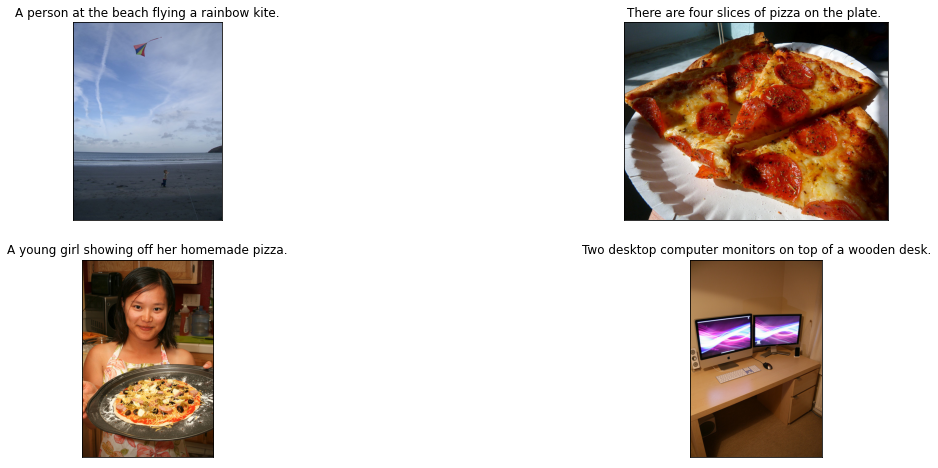

In [7]:
# Initialize a figure of size 20 X 8 inches
figure = plt.figure(figsize=(20, 8))

# Generate four random images and their captions
for i in range(4):
    random_index = np.random.randint(1, train_data.shape[0])
    ax = figure.add_subplot(2, 2, i + 1, xticks=[], yticks=[])
    image = cv2.imread(filename=train_data['Image'][random_index])
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.title.set_text(s=train_data['Caption'][random_index])

# Display the figure
plt.show()

---
<a name=Section5 id=Section5></a>
# **5. Data Pre-processing**
---

<a id=Section51 name=Section51></a>
### **5.1 Hyperparameter Initialization**

- Before, we beign our pre-processing, we will initialize a bunch of hyperparameters which will help us down the line.

In [31]:
# Initialize the hyperparameters
MAX_LENGTH = 40
VOCABULARY_SIZE = 15000
BATCH_SIZE = 64
BUFFER_SIZE = 1000
EMBEDDING_DIM = 512
UNITS = 512
EPOCHS = 5

<a id=Section52 name=Section52></a>
### **5.2 Caption Cleaning & Formatting**

- In this section, we will pre-process the caption data corresponding using regular expressions to each image.

In [9]:
def preprocessCaptions(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    text = '[start] ' + text + ' [end]'
    return text

# Apply the preprocessCaptions function to clean the data
train_data['Caption'] = train_data['Caption'].apply(preprocessCaptions)
print('Sampled Data Shape:', train_data.shape)
train_data.head()

Sampled Data Shape: (70000, 2)


,Image,Caption
0,/content/train2017/000000160866.jpg,[start] a view of a living room couch chair de...
1,/content/train2017/000000317838.jpg,[start] a park bench under a tree next to a la...
2,/content/train2017/000000119695.jpg,[start] a room with a toilet and some towels h...
3,/content/train2017/000000048824.jpg,[start] a worker ready to climb a pole on a ci...
4,/content/train2017/000000403826.jpg,[start] a man with a glove that is throwing a ...


<a id=Section53 name=Section53></a>
### **5.3 Text Vectorization**

- In this section, we will create tokens corresponding to all the available captions.

- In addition, we will also create a lookup table for the token vocabulary in both directions (word to index and vice versa).

In [10]:
# Tokenize text features to integer sequences.
tokenizer = tf.keras.layers.TextVectorization(max_tokens=VOCABULARY_SIZE, standardize=None, output_sequence_length=MAX_LENGTH)
tokenizer.adapt(train_data['Caption'])
print('Vocabulary Size:', tokenizer.vocabulary_size())

# Create a preprocessing lookups which maps string features to integer indices and vice-versa
word2idx = tf.keras.layers.StringLookup(mask_token="", vocabulary=tokenizer.get_vocabulary())
idx2word = tf.keras.layers.StringLookup(mask_token="", vocabulary=tokenizer.get_vocabulary(), invert=True)

Vocabulary Size: 11885


<a id=Section54 name=Section54></a>
### **5.4 Data Preparation**

- Next, we will split our data into training, validation, and testing sets and create batches using tensorflow slice operations.

In [11]:
# Initialize an empty dictionary list
image_caption_vector = collections.defaultdict(list)

# Append the Image and its corresponding captions
for image, caption in zip(train_data['Image'], train_data['Caption']):
    image_caption_vector[image].append(caption)

# Initialize keys from a list of image caption vector keys
image_keys = list(image_caption_vector.keys())

# Create a random shuffle of image keys
np.random.shuffle(image_keys)

# Create a slicing index of 80% for splitting entire data to train and test
first_slicer = int(len(image_keys) * 0.8)

# Create Train and Test images keys in 80:20 & then Final Train, Validation images keys in 80:20 from train set
train_images_keys, test_images_keys = (image_keys[:first_slicer], image_keys[first_slicer:])

# Create a second slicer to have further split of final training and validation
second_slicer = int(len(train_images_keys) * 0.8)

# Create final split of training and validation from the training set from earlier split
train_images_keys, valid_images_keys = (train_images_keys[:second_slicer], train_images_keys[second_slicer:])

# Initialize lists for training data and their captions
train_images, train_captions = list(), list()
for image in train_images_keys:
    caption_length = len(image_caption_vector[image])
    train_images.extend([image] * caption_length)
    train_captions.extend(image_caption_vector[image])

# Initialize lists for validation data and their captions
valid_images, valid_captions = list(), list()
for image in valid_images_keys:
    caption_length = len(image_caption_vector[image])
    valid_images.extend([image] * caption_length)
    valid_captions.extend(image_caption_vector[image])

# Initialize lists for validation data and their captions
test_images, test_captions = list(), list()
for image in test_images_keys:
    caption_length = len(image_caption_vector[image])
    test_images.extend([image] * caption_length)
    test_captions.extend(image_caption_vector[image])

# Display the shape of the training, valiation, testing sets, and total data
print('Total Data Shape:', (len(train_images) + len(valid_images) + len(test_images)))
print('------------------------')
print('Train Shape:', (len(train_images), len(train_captions)))
print('Validation Shape:', (len(valid_images), len(valid_captions)))
print('Test Shape:', (len(test_images), len(test_captions)))

Total Data Shape: 70000
------------------------
Train Shape: (44732, 44732)
Validation Shape: (11257, 11257)
Test Shape: (14011, 14011)


In [12]:
# Create a function to read and preprocess the image and caption as per Inception model
def load_data(image_path, caption):
    image = tf.io.read_file(filename=image_path)
    image = tf.io.decode_jpeg(contents=image, channels=3)
    image = tf.keras.layers.Resizing(height=299, width=299)(image)
    image = tf.keras.applications.inception_v3.preprocess_input(x=image)
    caption = tokenizer(caption)
    return image, caption

In [13]:
# Create train dataset having slices of Image and Captions in the form of objects specified as batch size
train_dataset = tf.data.Dataset.from_tensor_slices(tensors=(train_images, train_captions))
train_dataset = train_dataset.map(map_func=load_data, num_parallel_calls=tf.data.AUTOTUNE).shuffle(buffer_size=BUFFER_SIZE).batch(BATCH_SIZE)

# Create validation dataset having slices of Image and Captions in the form of objects specified as batch size
valid_dataset = tf.data.Dataset.from_tensor_slices(tensors=(valid_images, valid_captions))
valid_dataset = valid_dataset.map(map_func=load_data, num_parallel_calls=tf.data.AUTOTUNE).shuffle(buffer_size=BUFFER_SIZE).batch(BATCH_SIZE)

# Create test dataset having slices of Image and Captions in the form of objects specified as batch size
test_dataset = tf.data.Dataset.from_tensor_slices(tensors=(test_images, test_captions))
test_dataset = test_dataset.map(map_func=load_data, num_parallel_calls=tf.data.AUTOTUNE).shuffle(buffer_size=BUFFER_SIZE).batch(BATCH_SIZE)

# Initialize a squential layer having random flip, rotations, and contrast to augment the data
image_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal'), tf.keras.layers.RandomRotation(0.2), tf.keras.layers.RandomContrast(0.3)])

---
<a name=Section6 id=Section6></a>
# **6. Model Development & Evaluation**
---



<a id=Section61 name=Section61></a>
### **6.1 Network Design & Initialization**

- We will be using the following network design developed by Google with some tweak to implement the image captioning model.

- FYI, this a general architecture and we coudn't upload the original design because of the network complexity but the idea is similar.

<center><img src="https://drive.google.com/uc?id=1pOHVNNoRpNVIaMjdAE-Z8CRCd9x5oKVJ&export=download"></center>

<a id=Section62 name=Section62></a>
### **6.2 Classes & Methods Initialization**

- Before, we initiate model building, we have to develop some classes and methods which will ease our model learning.

- You can have a look at the function, classes and their methods to have better understading through their documentation.

In [14]:
def CNNEncoder():
    """
    Returns a CNN model using Inception V3 imagenet weights.
    
    ...

    Parameters:
    -----------
    None

    Returns:
    -------
    A CNN model using Inception V3 imagenet weights.
    """
    inception_v3 = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
    output = inception_v3.output
    output = tf.keras.layers.Reshape(target_shape=(-1, output.shape[-1]))(output)
    cnn_model = tf.keras.models.Model(inception_v3.input, output)
    return cnn_model

In [15]:
class Embeddings(tf.keras.layers.Layer):
    """
    This class implements the functionality of embedding layer. 
    
    ...

    Parameters:
    -----------
    vocab_size (integer): The size of the vocabulary.
    embed_dim (integer):  The size of the embedding dimensions.
    max_len (integer): The maximum length of the embedding layer.
    """
    def __init__(self, vocab_size, embed_dim, max_len):
        super().__init__()
        self.token_embeddings = tf.keras.layers.Embedding(vocab_size, embed_dim)
        self.position_embeddings = tf.keras.layers.Embedding(max_len, embed_dim, input_shape=(None, max_len))
    
    def call(self, input_ids):
        """
        This method overrides the functionality of call() method.

        ...

        Parameters:
        -----------
        input_ids (integer): The ids of the input data.

        Returns:
        -------
        It will return the token embeddings and their positions.
        """
        length = tf.shape(input_ids)[-1]
        position_ids = tf.range(start=0, limit=length, delta=1)
        position_ids = tf.expand_dims(position_ids, axis=0)
        token_embeddings = self.token_embeddings(input_ids)
        position_embeddings = self.position_embeddings(position_ids)
        return token_embeddings + position_embeddings

In [16]:
class TransformerEncoderLayer(tf.keras.layers.Layer):
    """
    This class implements the functionality of encoding layer. 
    
    ...

    Parameters:
    -----------
    embed_dim (integer):  The size of the embedding dimensions.
    num_heads (integer): The number of heads in multihead attention class.
    """
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense = tf.keras.layers.Dense(embed_dim, activation="relu")

    def call(self, x, training):
        """
        This method overrides the functionality of call() method.

        ...

        Parameters:
        -----------
        input_ids (integer): The ids of the input data.

        Returns:
        -------
        It will return the final layer of the encoding layer after apply normalization.
        """
        x = self.layer_norm_1(x)
        x = self.dense(x)
        attn_output = self.attention(query=x, value=x, key=x, attention_mask=None, training=training)
        x = self.layer_norm_2(x + attn_output)
        return x

In [17]:
class TransformerDecoderLayer(tf.keras.layers.Layer):
    """
    This class implements the functionality of decoding layer. 
    
    ...

    Parameters:
    -----------
    embed_dim (integer):  The size of the embedding dimensions.
    num_heads (integer): The number of heads in multihead attention class.
    """
    def __init__(self, embed_dim, units, num_heads):
        super().__init__()
        self.embedding = Embeddings(tokenizer.vocabulary_size(), embed_dim, MAX_LENGTH)
        self.attention_1 = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, dropout=0.1)
        self.attention_2 = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, dropout=0.1)
        self.layernorm_1 = tf.keras.layers.LayerNormalization()
        self.layernorm_2 = tf.keras.layers.LayerNormalization()
        self.layernorm_3 = tf.keras.layers.LayerNormalization()
        self.ffn_layer_1 = tf.keras.layers.Dense(units, activation="relu")
        self.ffn_layer_2 = tf.keras.layers.Dense(embed_dim)
        self.out = tf.keras.layers.Dense(tokenizer.vocabulary_size(), activation="softmax")
        self.dropout_1 = tf.keras.layers.Dropout(0.3)
        self.dropout_2 = tf.keras.layers.Dropout(0.5)

    def call(self, input_ids, encoder_output, training, mask=None):
        """
        This method overrides the functionality of call() method.

        ...

        Parameters:
        -----------
        input_ids (integer): The ids of the input data.
        encoder_output (layer): The output of the encoder layer as a tensor object.
        training (data): The training data.
        mask (boolean): To apply attention maks, default as None.

        Returns:
        -------
        It will returns the prediction of the captions corresponding to the images.
        """
        embeddings = self.embedding(input_ids)
        combined_mask = None
        padding_mask = None
        if mask is not None:
            causal_mask = self.get_causal_attention_mask(embeddings)
            padding_mask = tf.cast(mask[:, :, tf.newaxis], dtype=tf.int32)
            combined_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.int32)
            combined_mask = tf.minimum(combined_mask, causal_mask)

        attn_output_1 = self.attention_1(query=embeddings, value=embeddings, key=embeddings, attention_mask=combined_mask, training=training)
        out_1 = self.layernorm_1(embeddings + attn_output_1)
        attn_output_2 = self.attention_2(query=out_1, value=encoder_output, key=encoder_output, attention_mask=padding_mask, training=training)
        out_2 = self.layernorm_2(out_1 + attn_output_2)

        ffn_out = self.ffn_layer_1(out_2)
        ffn_out = self.dropout_1(ffn_out, training=training)
        ffn_out = self.ffn_layer_2(ffn_out)

        ffn_out = self.layernorm_3(ffn_out + out_2)
        ffn_out = self.dropout_2(ffn_out, training=training)
        preds = self.out(ffn_out)
        return preds

    def get_causal_attention_mask(self, inputs):
        """
        This method define the attention mask for the inputs.

        ...

        Parameters:
        -----------
        inputs (data): The input data to mask.

        Returns:
        -------
        It will returns a titlted tensor of the developed mask input.
        """
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat([tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)

In [18]:
class ImageCaptioningModel(tf.keras.Model):
    """
    This class implements the model of Image Captioning. 
    
    ...

    Parameters:
    -----------
    cnn_model (model):  The CNN model having Inception V3.
    encoder (transformer): The encoder object of the transform type encoder.
    decoder (transformer): The decoder object of the transform type decoder.
    image_aug (object): The tensor having details of augmenting dataset.
    """
    def __init__(self, cnn_model, encoder, decoder, image_aug=None):
        super().__init__()
        self.cnn_model = cnn_model
        self.encoder = encoder
        self.decoder = decoder
        self.image_aug = image_aug
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.acc_tracker = tf.keras.metrics.Mean(name="accuracy")

    def calculate_loss(self, y_true, y_pred, mask):
        """
        This method estimate the loss corresponding true and predicted labels.

        ...

        Parameters:
        -----------
        y_true (list): The true labels.
        y_pred (list): The predicted labels.

        Returns:
        -------
        It will returns the loss corresponding true and predicted labels.
        """
        loss = self.loss(y_true, y_pred)
        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)

    def calculate_accuracy(self, y_true, y_pred, mask):
        """
        This method estimate the accuracy corresponding true and predicted labels.

        ...

        Parameters:
        -----------
        y_true (list): The true labels.
        y_pred (list): The predicted labels.

        Returns:
        -------
        It will returns the accuracy corresponding true and predicted labels.
        """
        loss = self.loss(y_true, y_pred)
        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)
        accuracy = tf.equal(y_true, tf.argmax(y_pred, axis=2))
        accuracy = tf.math.logical_and(mask, accuracy)
        accuracy = tf.cast(accuracy, dtype=tf.float32)
        mask = tf.cast(mask, dtype=tf.float32)
        return tf.reduce_sum(accuracy) / tf.reduce_sum(mask)

    def compute_loss_and_acc(self, img_embed, captions, training=True):
        """
        This method estimate the loss and accuracy corresponding true and predicted labels.

        ...

        Parameters:
        -----------
        img_embed (embeddings): The output of the embedding layer.
        captions (captions): The caption data.

        Returns:
        -------
        It will returns the loss and accuracy corresponding true and predicted labels.
        """
        encoder_output = self.encoder(img_embed, training=True)
        y_input = captions[:, :-1]
        y_true = captions[:, 1:]
        mask = (y_true != 0)
        y_pred = self.decoder(y_input, encoder_output, training=True, mask=mask)
        loss = self.calculate_loss(y_true, y_pred, mask)
        acc = self.calculate_accuracy(y_true, y_pred, mask)
        return loss, acc
    
    def train_step(self, batch):
        """
        This method generate train step using the passed batches.

        ...

        Parameters:
        -----------
        batch (batch): The data in batch.

        Returns:
        -------
        It will returns the train loss and accuracy corresponding true and predicted labels.
        """
        imgs, captions = batch
        if self.image_aug:
            imgs = self.image_aug(imgs)
        img_embed = self.cnn_model(imgs)
        with tf.GradientTape() as tape:
            loss, acc = self.compute_loss_and_acc(img_embed, captions)
        train_vars = (self.encoder.trainable_variables + self.decoder.trainable_variables)
        grads = tape.gradient(loss, train_vars)
        self.optimizer.apply_gradients(zip(grads, train_vars))
        self.loss_tracker.update_state(loss)
        self.acc_tracker.update_state(acc)
        return {"loss": self.loss_tracker.result(), "acc": self.acc_tracker.result()}
    
    def test_step(self, batch):
        """
        This method generate test step using the batches.

        ...

        Parameters:
        -----------
        batch (batch): The data in batch.

        Returns:
        -------
        It will returns the test loss and accuracy corresponding true and predicted labels.
        """
        imgs, captions = batch
        img_embed = self.cnn_model(imgs)
        loss, acc = self.compute_loss_and_acc(img_embed, captions, training=False)
        self.loss_tracker.update_state(loss)
        self.acc_tracker.update_state(acc)
        return {"loss": self.loss_tracker.result(), "acc": self.acc_tracker.result()}

    @property
    def metrics(self):
        """
        This method will create a loss and accuracy metric.

        ...

        Parameters:
        -----------
        None

        Returns:
        -------
        It will returns the loss and accuracy corresponding true and predicted labels as a list.
        """
        return [self.loss_tracker, self.acc_tracker]

<a id=Section63 name=Section63></a>
### **6.3 Network Training**

- Let's train the initialized network to build a model for our data.

- We tried several optimizers, but Adam optimizer gave us good results, so we choose to stick with it.

- For loss function, we choose spark categorical cross entropy because the problem is oriented to predict words from image.

- For metrics, we choose to use accuracy and the corresponding loss to finalize the model.

In [19]:
# Initialize the encoders, decoders, caption model, loss, early stopping and compilation step
encoder = TransformerEncoderLayer(embed_dim=EMBEDDING_DIM, num_heads=1)
decoder = TransformerDecoderLayer(embed_dim=EMBEDDING_DIM, units=UNITS, num_heads=8)
caption_model = ImageCaptioningModel(cnn_model=CNNEncoder(), encoder=encoder, decoder=decoder, image_aug=image_augmentation)
cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction="none")
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
caption_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=cross_entropy)

87910968/87910968 [==============================] - 1s 0us/step


In [20]:
# Initialize the start time
start_time = time.time()

# Train the model with the train and validation data using early stopping and number of epochs
history = caption_model.fit(train_dataset, epochs=EPOCHS, validation_data=valid_dataset, callbacks=[early_stopping])

# Find total time take to peform model training
end_time = time.time()
total_time = end_time - start_time

# To format the display time
if total_time < 60:
    print("Total Time Taken:", round(total_time, 2), "seconds")
elif total_time < 3600:
    minutes = int(total_time // 60)
    seconds = round(total_time % 60, 2)
    print("Total Time Taken:", minutes, "minutes", seconds, "seconds")
else:
    hours = int(total_time // 3600)
    minutes = int((total_time % 3600) // 60)
    seconds = round(total_time % 60, 2)
    print("Total Time Taken:", hours, "hours", minutes, "minutes", seconds, "seconds")

Epoch 1/30
699/699 [==============================] - 908s 1s/step - loss: 4.2799 - acc: 4.9502 - val_loss: 3.5984 - val_acc: 3.5984
Epoch 2/30
699/699 [==============================] - 870s 1s/step - loss: 3.4195 - acc: 3.5129 - val_loss: 3.3459 - val_acc: 3.3459
Epoch 3/30
699/699 [==============================] - 872s 1s/step - loss: 3.1686 - acc: 3.2172 - val_loss: 3.2401 - val_acc: 3.2401
Epoch 4/30
699/699 [==============================] - 868s 1s/step - loss: 3.0174 - acc: 3.0494 - val_loss: 3.2208 - val_acc: 3.2208
Epoch 5/30
699/699 [==============================] - 875s 1s/step - loss: 2.9079 - acc: 2.9279 - val_loss: 3.1940 - val_acc: 3.1940
Epoch 6/30
699/699 [==============================] - 879s 1s/step - loss: 2.8107 - acc: 2.8313 - val_loss: 3.1979 - val_acc: 3.1979
Epoch 7/30
699/699 [==============================] - 867s 1s/step - loss: 2.7298 - acc: 2.7463 - val_loss: 3.2007 - val_acc: 3.2007
Epoch 8/30
699/699 [==============================] - 870s 1s/step - 

<a id=Section64 name=Section64></a>
### **6.4 Network Evaluation**

- Let's evaluate our developed model concerning our chosen metric obtained after several iterations.

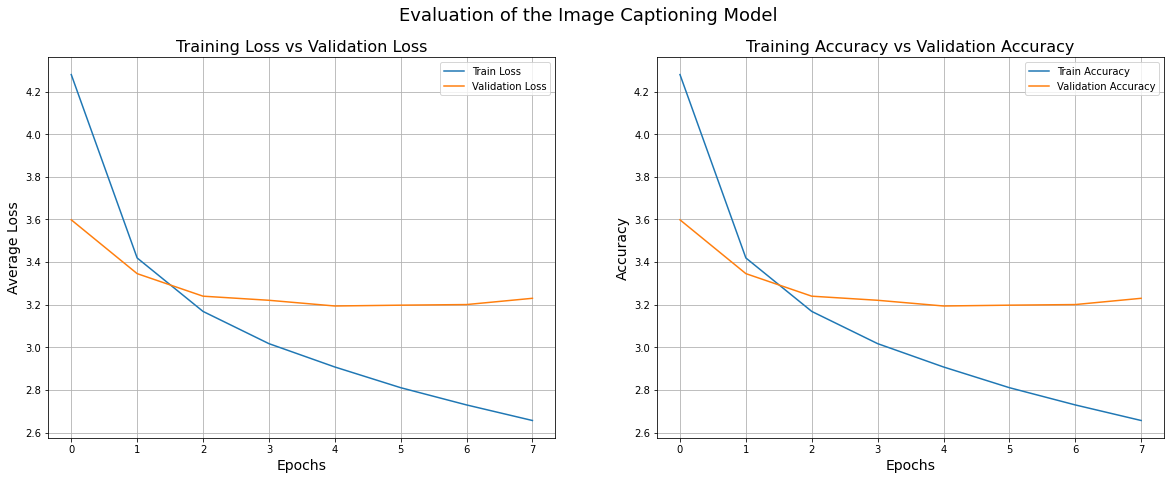

In [35]:
# Plot the evaluation results
plt.figure(figsize=[20, 7])
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel(xlabel='Epochs', size=14)
plt.ylabel(ylabel='Average Loss', size=14)
plt.title(label='Training Loss vs Validation Loss', size=16)
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel(xlabel='Epochs', size=14)
plt.ylabel(ylabel='Accuracy', size=14)
plt.title(label='Training Accuracy vs Validation Accuracy', size=16)
plt.legend()
plt.grid()
plt.suptitle(t='Evaluation of the Image Captioning Model', size=18)
plt.show()

- Let's have a look at our test results concerning evaluation metric.

In [ ]:
print('Test Data Loss and Accuracy:')
print(caption_model.evaluate(test_dataset))

Test Data Loss and Accuracy:
219/219 [==============================] - 110s 467ms/step - loss: 3.1921 - acc: 0.4187
[3.192054271697998, 0.41777363419532776]


<strong>Observations:</strong>

- We can obsever that the result are generalizing very well with our training results and finally we will same to our system.

- But the problem is that we are training the model over only five epochs, and it requires a higher number.

- This notebook is developed using Google Collaboratory with sample data of 70000 images (~11 GB).

- Please note that Google only provides a limited quota to use GPU (standard one).

- When this quota gets replenished, we can't verify, so due to the limited resources, we couldn't train the model and get the best results.

- But the idea is similar to developing the model and generating image captions.


<strong>NOTE for the Evaluator:</strong>

- A confusion matrix is a standard tool for evaluating a classification task, i.e. one where the target is a categorical variable. 

- It is a table which allows observing the test instances having true class X and are predicted class Y, for every class X and Y. 

- This is practical only with a small number of classes of course, otherwise the confusion matrix is not readable.

- The task of image captioning is not classification. 

- The target is unstructured data (text), not a categorical variable with a finite set of possible values. 

- Therefore it requires a different (and more complex) evaluation method which is not possible in our scenario.

In [ ]:
# Save the network model in h5 format
caption_model.save_weights('model.h5')

<a id=Section65 name=Section65></a>
### **6.5 Image Captioning**

- Now, its time to generate captions using some random images along with their actual captions.

- Below, we have developed two functions, which will help us to achieve the same.

In [ ]:
def loadImage(path):
    """
    This method will load an image after doing some processing over it.

    ...

    Parameters:
    -----------
    path (string): A full path of the image.

    Returns:
    -------
    It will returns a processed image.
    """
    image = tf.io.read_file(filename=path)
    image = tf.io.decode_jpeg(contents=image, channels=3)
    image = tf.keras.layers.Resizing(height=299, width=299)(image)
    image = tf.keras.applications.inception_v3.preprocess_input(x=image)
    return image

def generateCaption(image_path, add_noise=False):
    """
    This method will generate a caption for the image.

    ...

    Parameters:
    -----------
    image_path (string): A full path of the image.
    add_noise (boolean): To add nosie to the image.

    Returns:
    -------
    It will returns a caption corresponding to the image.
    """
    image = loadImage(path=image_path)
    if add_noise:
        noise = tf.random.normal(shape=image.shape) * 0.1
        image = image + noise
        image = (image - tf.reduce_min(input_tensor=image)) / (tf.reduce_max(input_tensor=image) - tf.reduce_min(input_tensor=image))

    image = tf.expand_dims(image, axis=0)
    image_embed = caption_model.cnn_model(image)
    image_encoded = caption_model.encoder(image_embed, training=False)

    target = '[start]'
    for i in range(MAX_LENGTH - 1):
        tokenized = tokenizer([target])[:, :-1]
        mask = tf.cast(x=tokenized != 0, dtype=tf.int32)
        prediction = caption_model.decoder(tokenized, image_encoded, training=False, mask=mask)
        prediction_index = np.argmax(a=prediction[0, i, :])
        prediction_index = tf.convert_to_tensor(value=prediction_index)
        predicted_word = idx2word(prediction_index).numpy().decode('utf-8')
        if predicted_word == '[end]':
            break
        target += ' ' + predicted_word
    
    target = target.replace('[start] ', '')
    return target

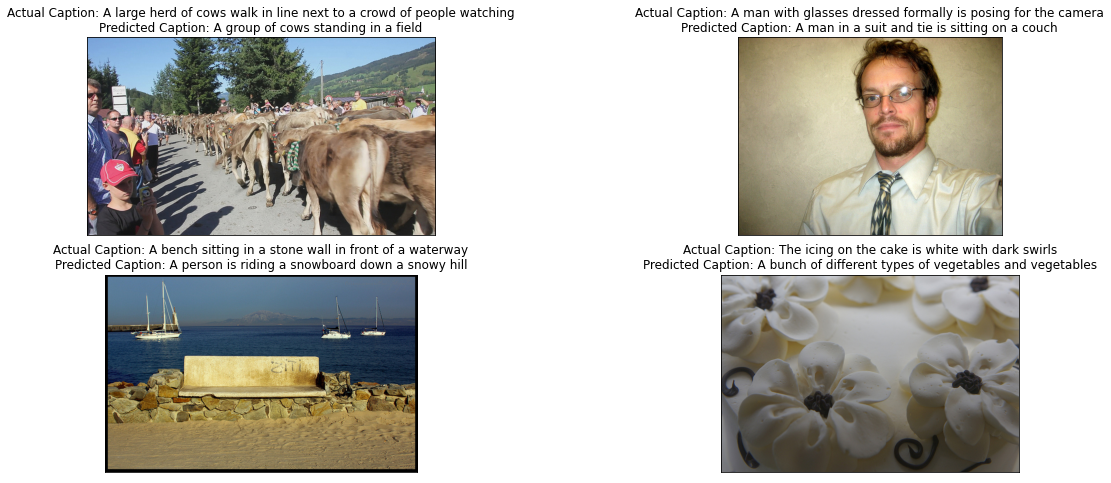

In [ ]:
# Initialize a figure of size 20 X 8 inches
figure = plt.figure(figsize=(20, 8))

# Generate four random images and their captions
for i in range(4):
    random_index = np.random.randint(1, train_data.shape[0])
    ax = figure.add_subplot(2, 2, i + 1, xticks=[], yticks=[])
    image_path = train_data['Image'][random_index]
    image = cv2.imread(filename=image_path)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    actual_caption = train_data['Caption'][random_index].replace('[start] ', '').replace(' [end]', '').capitalize()
    predicted_caption = generateCaption(image_path=image_path).capitalize()
    title = 'Actual Caption: ' + actual_caption + '\nPredicted Caption: ' + predicted_caption
    ax.title.set_text(s=title)

# Display the figure
plt.show()

- Let's take some random images from the internet and try to generate captions for them.

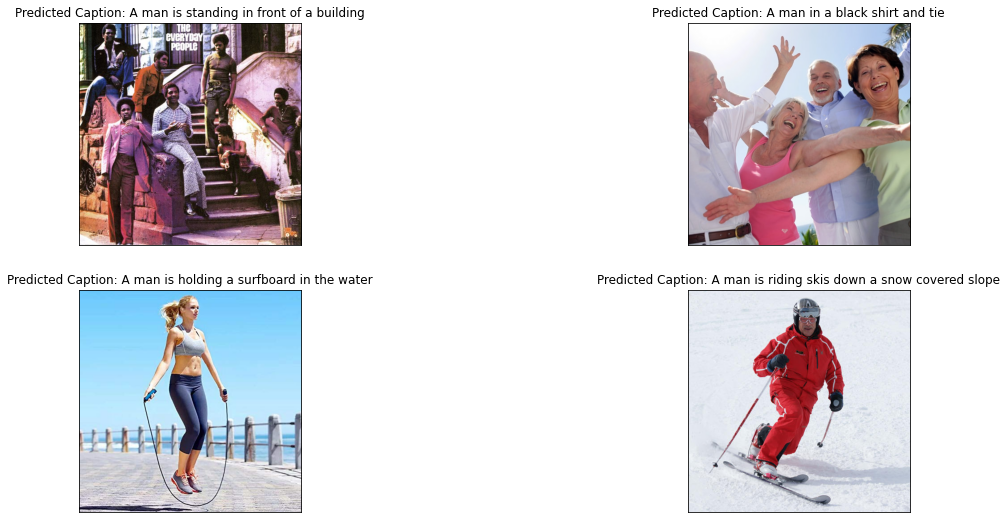

In [ ]:
# List of image URLs to choose from
image_urls = ["https://c.saavncdn.com/454/The-Everyday-People-Expanded-Version--English-1972-20191203061836-500x500.jpg", 
              "http://www.firsteatright.com/uploads/8/2/4/7/82475322/laughing-heart-health_orig.jpg",
              "https://m.media-amazon.com/images/I/51Te7RYcTrL.jpg",
              "https://3.imimg.com/data3/XB/SQ/GLADMIN-176472/skiing-services-500x500.jpg"]

# Initialize a figure of size 20 X 9 inches
figure = plt.figure(figsize=(20, 9))  

# Download the images and save them to disk
for i, url in enumerate(image_urls):
    response = requests.get(url)
    with open(file=f'image_{i + 1}.jpg', mode='wb') as downloadfile:
        downloadfile.write(response.content)
    ax = figure.add_subplot(2, 2, i + 1, xticks=[], yticks=[])
    image_path = os.path.join(os.getcwd(), f'image_{i + 1}.jpg')
    image = cv2.imread(filename=image_path)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    title = 'Predicted Caption: ' + generateCaption(image_path=image_path).capitalize()
    ax.title.set_text(s=title)

# Display the figure
plt.show()

---
<a name=Section7 id=Section7></a>
# **7. Summarization**
---



<a id=Section71 name=Section71></a>
### **7.1 Conclusion**

- Through this assignment, we learned several aspects of deep learning taught in the class.

- We explored how to use transfer learning with big datasets like the COCO dataset and get the best result of it.

- We initiated by downloading and loading the data to our variables and plotting four random images and their captions.

- Then, we preprocessed the images and the captions to be ready for our network architecture.

- We performed text vectorization over the captions and transformed the data into a batch format.

- We transformed the data into batches because it gives a computational advantage (efficiently) when we train the model learning.

- Then, we made a bunch of classes and associated methods, which helped us in network training.

- We used Inception V3 and the imagenet weights to perform transfer learning over the image data to learn the features.

- Then, we prepared a decoder using the attention mechanism, embedding, and some dropout layers.

- This decoder allowed us to generate words up to define hyperparameter length earlier in the code cells.

- Then, we trained the network and obtained the metrics, which we plotted side by side for both training and validation data.

- Next, we evaluated our testing data and saved the model results in h5 format to the system.

- Due to limited hardware resources, we couldn't get the best results, but the idea is the same to develop an image captioning model.

- Then, we used random images from training data and plotted them on a graph showing actual between predicted captions.

- Finally, we downloaded some random images from the internet and predicted their captions.

<a id=Section72 name=Section72></a>
### **7.2 Solution**

- The model requires more training over a higher number of epochs using a sufficient amount of resources.

- Post-training the model, we can verify the results and evaluate them.

- Finally, DevOps Engineer can build an API of this model, and we can share it with the firm as a small data application.